In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost as xgb
import itertools
import warnings
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*was renamed to 'ensure_all_finite'.*")

# Import Data

used variables:
Total vehicles sold (Target)
- 'Company car tax rate (%)'
- 'Google  Home charging (G)'
- Consumer confidence
- Avergae gas price





In [2]:
# Load data
df = pd.read_csv(r"C:\Users\dylan\OneDrive - HvA\AAI Master\BLOK 3 afstuderen\Thesis\Eigenwerk\DATASET\AVG_Gas.csv")
df["Time Period (T)"] = pd.to_datetime(df["Time Period (T)"], format="%Y-%m-%d")
df = df.sort_values("Time Period (T)").reset_index(drop=True)
display(df.head())

,Time Period (T),Home charging (G),Electric car (G),Hybrid electric (G),Company car tax rate (%),Consumer confidence (E),Economic climate perception (E),Willingness to buy (E),Major purchases sentiment (E),Gasoline (Euro95) - Average price (F),Diesel - Average price (F),Total vehicles sold (Target)
0,2007-01-01,0,1,0,22,20.0,37.0,9.0,8.0,1.303032,0.970000,31
1,2007-02-01,0,0,0,22,20.0,37.0,9.0,8.0,1.325357,0.990000,39
2,2007-03-01,0,0,0,22,20.0,37.0,9.0,8.0,1.379032,1.006323,123
3,2007-04-01,0,0,0,22,20.0,37.0,9.0,8.0,1.426500,1.030600,62
4,2007-05-01,0,2,0,22,18.0,32.0,9.0,7.4,1.466516,1.032323,84


# 1. Apply train/val/test split

In [ ]:
# Define features and target
features = ['Company car tax rate (%)', 'Home charging (G)', 'Consumer confidence (E)']
target = 'Total vehicles sold (Target)'

# Calculate split indices
n = len(df)
train_end = int(n * 0.8)
val_end = int(n * 0.9)

# Split the target
y = df[target]
y_train = y.iloc[:train_end]
y_val = y.iloc[train_end:val_end]
y_test = y.iloc[val_end:]

# Split each feature separately
companytax_train = df['Company car tax rate (%)'].iloc[:train_end]
companytax_val = df['Company car tax rate (%)'].iloc[train_end:val_end]
companytax_test = df['Company car tax rate (%)'].iloc[val_end:]

homechg_train = df['Home charging (G)'].iloc[:train_end]
homechg_val = df['Home charging (G)'].iloc[train_end:val_end]
homechg_test = df['Home charging (G)'].iloc[val_end:]

conf_train = df['Consumer confidence (E)'].iloc[:train_end]
conf_val = df['Consumer confidence (E)'].iloc[train_end:val_end]
conf_test = df['Consumer confidence (E)'].iloc[val_end:]

# Print sizes
print(f"Train size: {len(y_train)}, Val size: {len(y_val)}, Test size: {len(y_test)}")


# Print each dataset
print("y_train:\n", y_train.head(), "\n")
print("y_val:\n", y_val.head(), "\n")
print("y_test:\n", y_test.head(), "\n")

print("companytax_train:\n", companytax_train.head(), "\n")
print("companytax_val:\n", companytax_val.head(), "\n")
print("companytax_test:\n", companytax_test.head(), "\n")

print("homechg_train:\n", homechg_train.head(), "\n")
print("homechg_val:\n", homechg_val.head(), "\n")
print("homechg_test:\n", homechg_test.head(), "\n")

print("conf_train:\n", conf_train.head(), "\n")
print("conf_val:\n", conf_val.head(), "\n")
print("conf_test:\n", conf_test.head(), "\n")

# Show percentage of each split
print(f"Train: {len(y_train)/n:.1%}, Val: {len(y_val)/n:.1%}, Test: {len(y_test)/n:.1%}")



Train size: 173, Val size: 22, Test size: 22
y_train:
 0     31
1     39
2    123
3     62
4     84
Name: Total vehicles sold (Target), dtype: int64 

y_val:
 173    15736
174    14522
175    14615
176    15143
177    14904
Name: Total vehicles sold (Target), dtype: int64 

y_test:
 195    18281
196    22305
197    27262
198    27851
199    22109
Name: Total vehicles sold (Target), dtype: int64 

companytax_train:
 0    22
1    22
2    22
3    22
4    22
Name: Company car tax rate (%), dtype: int64 

companytax_val:
 173    12
174    12
175    12
176    12
177    12
Name: Company car tax rate (%), dtype: int64 

companytax_test:
 195    16
196    16
197    16
198    16
199    16
Name: Company car tax rate (%), dtype: int64 

homechg_train:
 0    0
1    0
2    0
3    0
4    0
Name: Home charging (G), dtype: int64 

homechg_val:
 173    51
174    60
175    70
176    71
177    73
Name: Home charging (G), dtype: int64 

homechg_test:
 195    58
196    61
197    50
198    65
199    73
Name:

# 2. Plot all data and boxcox transform it

Company car tax rate (%): lambda=0.3553071918642989, shift=1
Home charging (G): lambda=0.1026320662583565, shift=1
Consumer confidence (E): lambda=0.9074223886617425, shift=60.0
Total vehicles sold (Target): lambda=-0.002079636725042893, shift=0


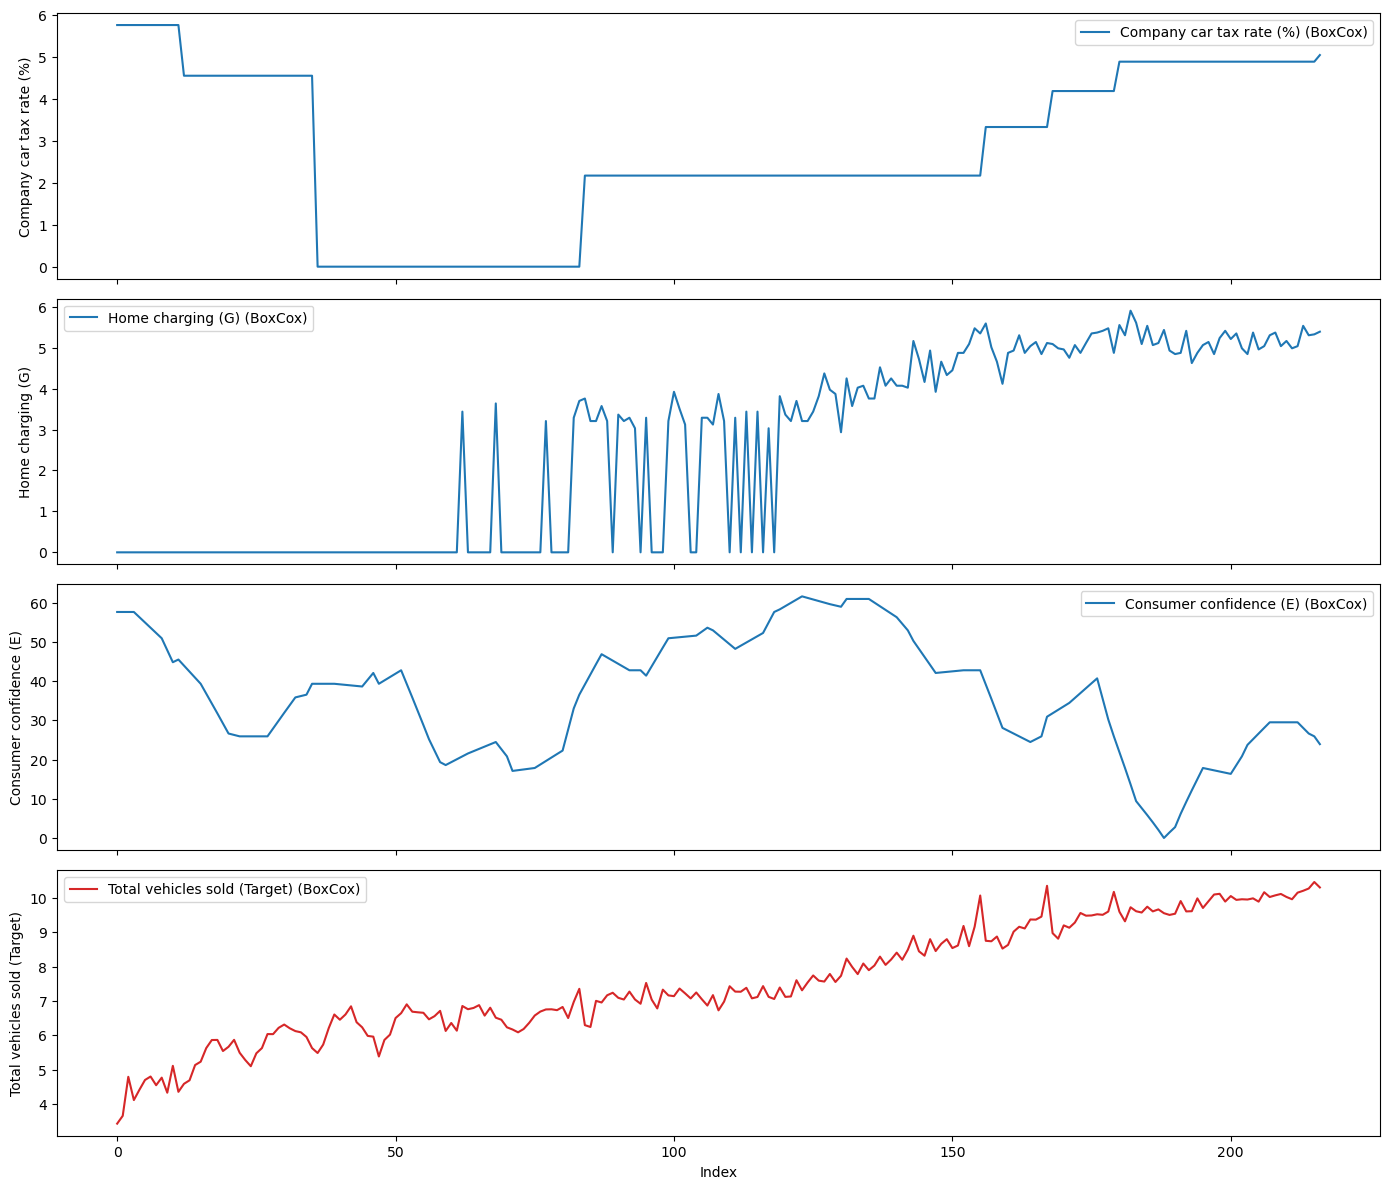

In [25]:
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt

# Find optimal lambda and shift for each feature and target on the whole dataset
boxcox_all = {}
boxcox_lambdas_all = {}

for col in features + [target]:
    series = df[col]
    min_val = series.min()
    if min_val <= 0:
        shift = -min_val + 1
        series_shifted = series + shift
    else:
        shift = 0
        series_shifted = series
    transformed, lam = boxcox(series_shifted)
    boxcox_all[col] = transformed
    boxcox_lambdas_all[col] = (lam, shift)
    print(f"{col}: lambda={lam}, shift={shift}")

# Plot BoxCox-transformed data for all features and target
fig, axs = plt.subplots(len(features) + 1, 1, figsize=(14, 12), sharex=True)
for i, col in enumerate(features):
    axs[i].plot(df.index, boxcox_all[col], label=f"{col} (BoxCox)")
    axs[i].set_ylabel(col)
    axs[i].legend()
axs[-1].plot(df.index, boxcox_all[target], label=f"{target} (BoxCox)", color='tab:red')
axs[-1].set_ylabel(target)
axs[-1].set_xlabel("Index")
axs[-1].legend()
plt.tight_layout()
plt.show()




#### Train

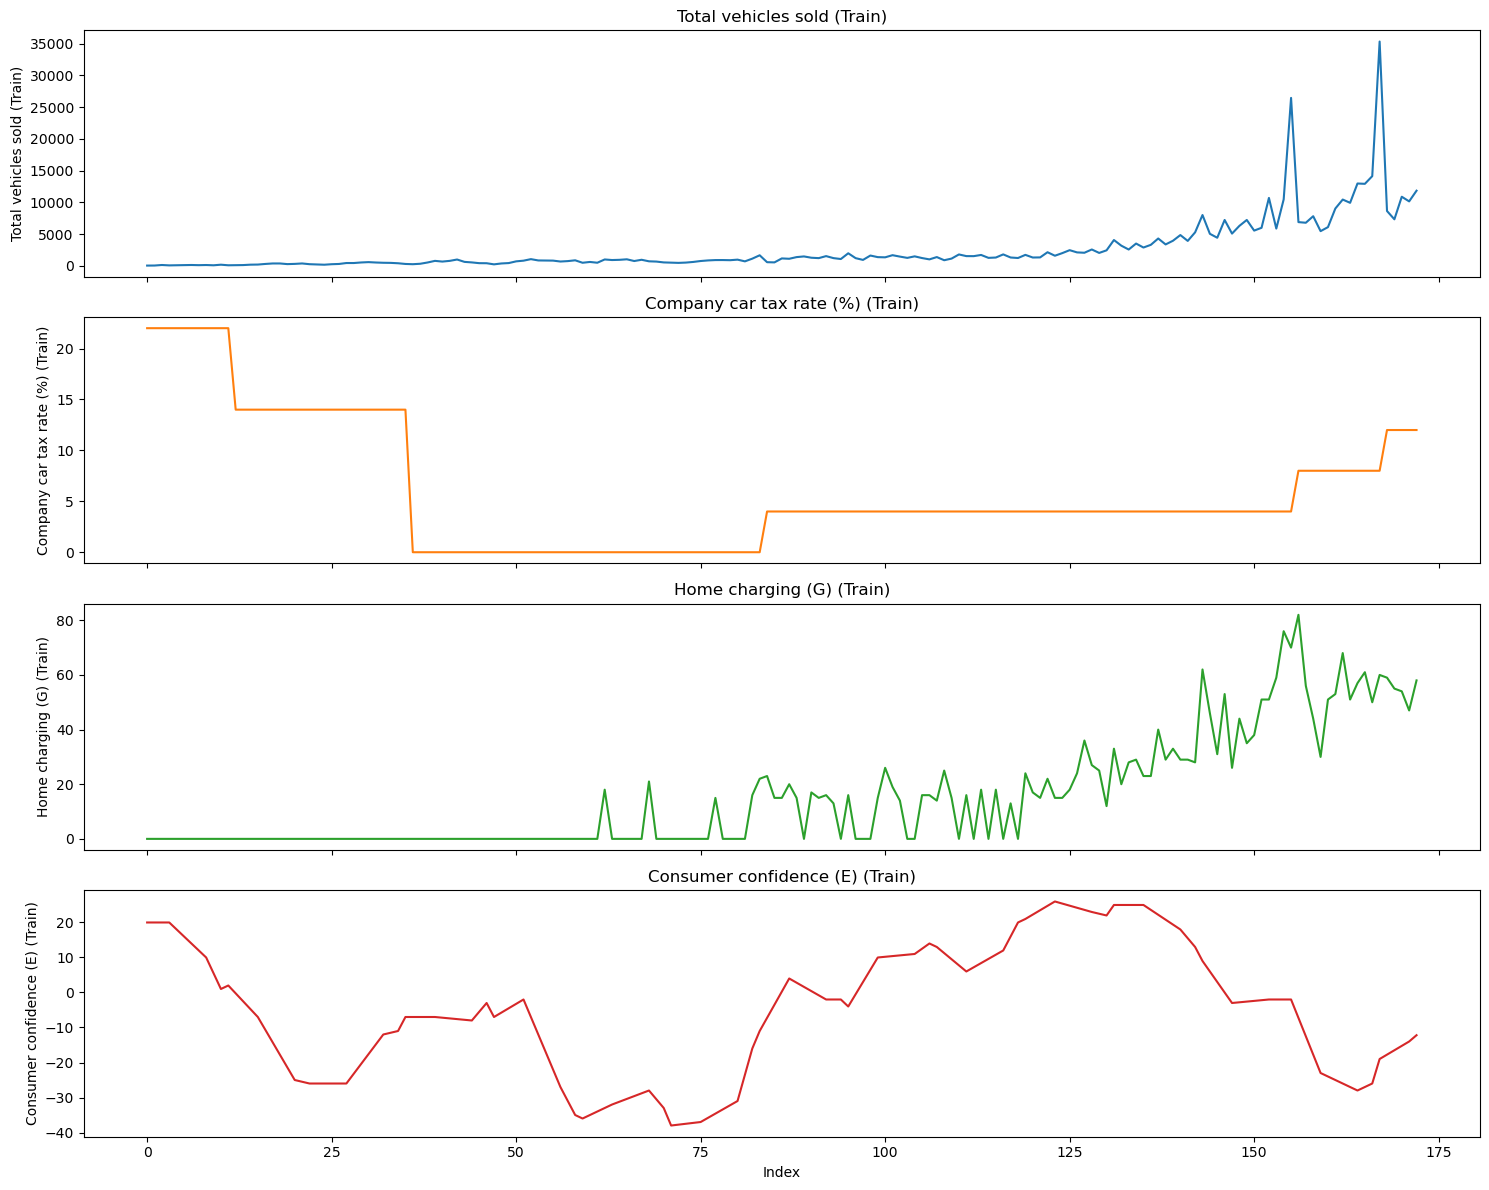

In [27]:
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

axs[0].plot(y_train.index, y_train, color='tab:blue')
axs[0].set_ylabel('Total vehicles sold (Train)')
axs[0].set_title('Total vehicles sold (Train)')

axs[1].plot(companytax_train.index, companytax_train, color='tab:orange')
axs[1].set_ylabel('Company car tax rate (%) (Train)')
axs[1].set_title('Company car tax rate (%) (Train)')

axs[2].plot(homechg_train.index, homechg_train, color='tab:green')
axs[2].set_ylabel('Home charging (G) (Train)')
axs[2].set_title('Home charging (G) (Train)')

axs[3].plot(conf_train.index, conf_train, color='tab:red')
axs[3].set_ylabel('Consumer confidence (E) (Train)')
axs[3].set_title('Consumer confidence (E) (Train)')
axs[3].set_xlabel('Index')

plt.tight_layout()
plt.show()

Company car tax rate (%): λ = 0.3553, shift = 1
Home charging (G): λ = 0.1026, shift = 1
Consumer confidence (E): λ = 0.9074, shift = 60.0
Total vehicles sold (Target): λ = -0.0021, shift = 0


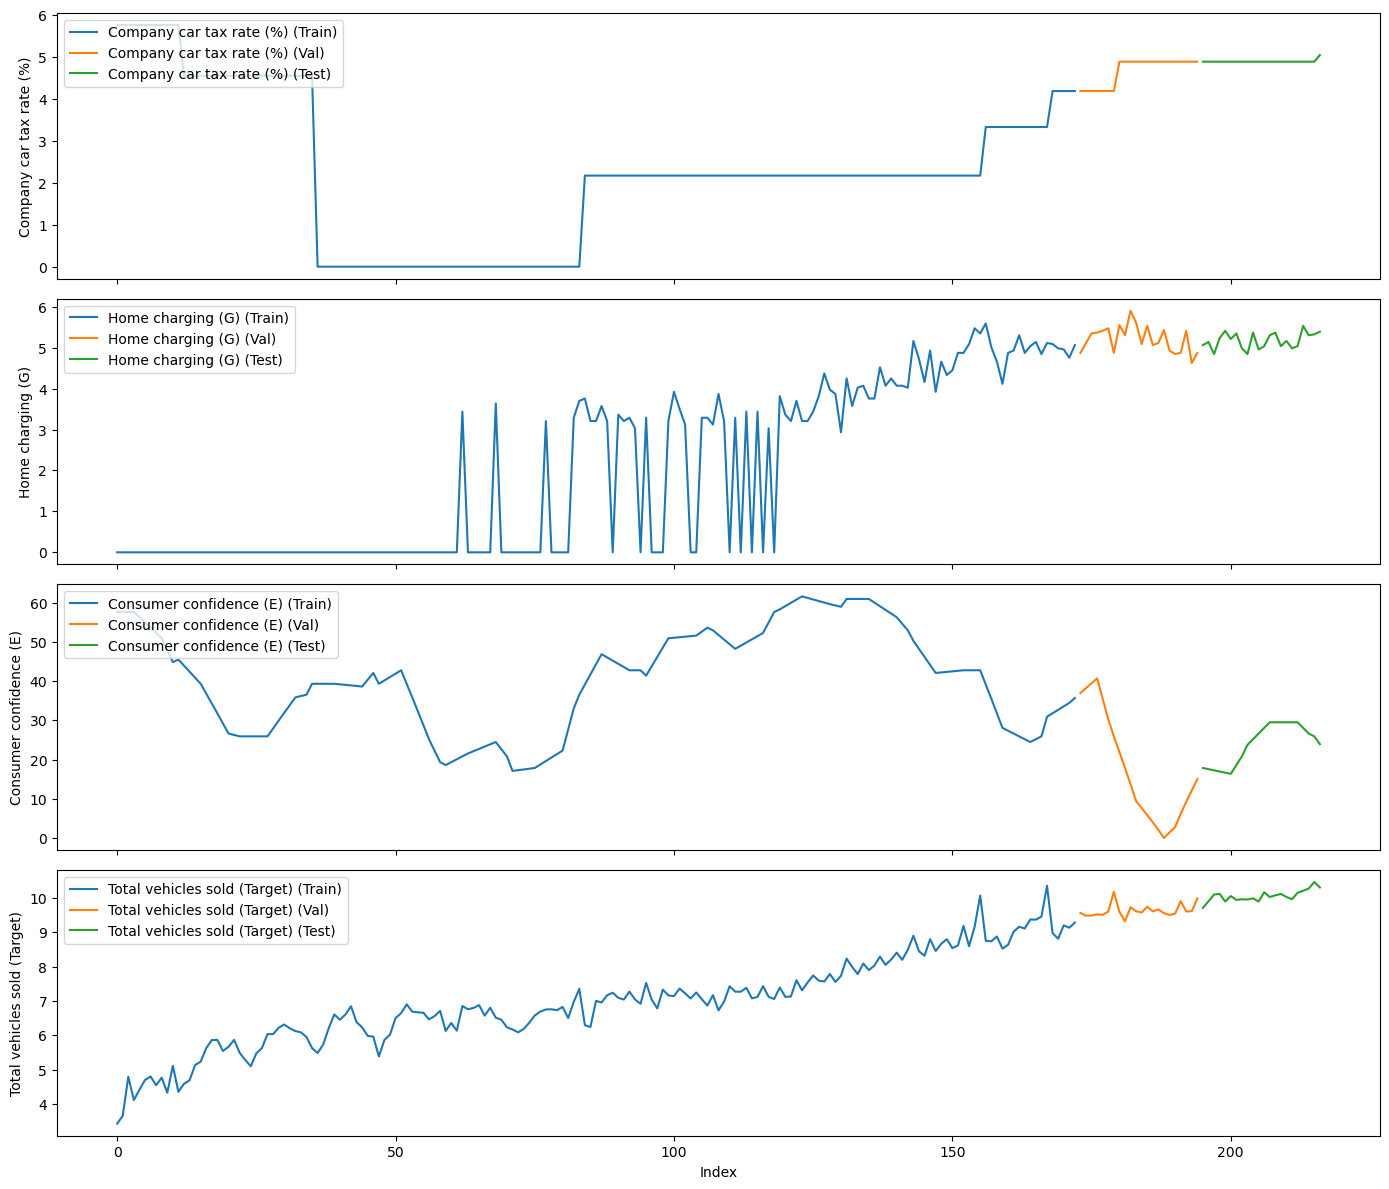

In [26]:
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt

# Splits instellen (80/10/10)
n = len(df)
train_end = int(n * 0.8)
val_end = int(n * 0.9)

# Opslag
boxcox_all = {}
boxcox_lambdas_all = {}

# Bereken BoxCox over de hele dataset (met correcte shift)
for col in features + [target]:
    series = df[col]
    min_val = series.min()
    if min_val <= 0:
        shift = -min_val + 1
        series_shifted = series + shift
    else:
        shift = 0
        series_shifted = series
    transformed, lam = boxcox(series_shifted)
    boxcox_all[col] = transformed
    boxcox_lambdas_all[col] = (lam, shift)
    print(f"{col}: λ = {lam:.4f}, shift = {shift}")

# Plot per split
fig, axs = plt.subplots(len(features) + 1, 1, figsize=(14, 12), sharex=True)
for i, col in enumerate(features):
    axs[i].plot(df.index[:train_end], boxcox_all[col][:train_end], label=f"{col} (Train)", color='tab:blue')
    axs[i].plot(df.index[train_end:val_end], boxcox_all[col][train_end:val_end], label=f"{col} (Val)", color='tab:orange')
    axs[i].plot(df.index[val_end:], boxcox_all[col][val_end:], label=f"{col} (Test)", color='tab:green')
    axs[i].set_ylabel(col)
    axs[i].legend(loc="upper left")

# Target plot
axs[-1].plot(df.index[:train_end], boxcox_all[target][:train_end], label=f"{target} (Train)", color='tab:blue')
axs[-1].plot(df.index[train_end:val_end], boxcox_all[target][train_end:val_end], label=f"{target} (Val)", color='tab:orange')
axs[-1].plot(df.index[val_end:], boxcox_all[target][val_end:], label=f"{target} (Test)", color='tab:green')
axs[-1].set_ylabel(target)
axs[-1].set_xlabel("Index")
axs[-1].legend(loc="upper left")

plt.tight_layout()
plt.show()




# 3. run stationary tests

## Target

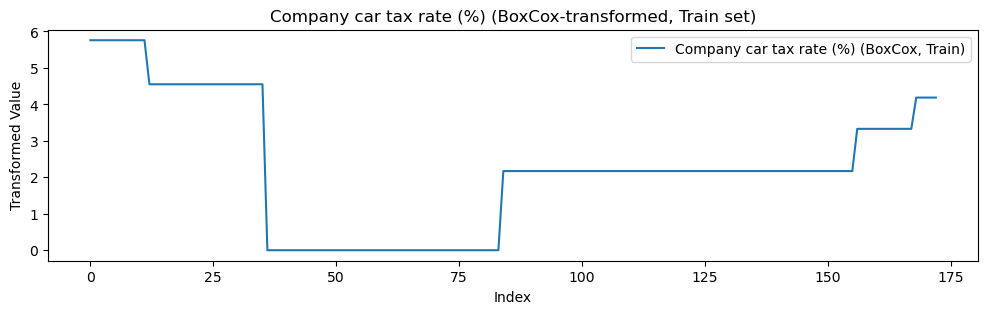

==== Company car tax rate (%) ====
ADF Statistic: -1.9616509753433216
ADF p-value: 0.3036366851664807
ADF Critical Value (1%): -3.4690
ADF Critical Value (5%): -2.8785
ADF Critical Value (10%): -2.5758
ADF: The series is likely non-stationary (fail to reject H0).
KPSS Statistic: 0.3745620074363245
KPSS p-value: 0.0881198243808946
KPSS Critical Value (10%): 0.3470
KPSS Critical Value (5%): 0.4630
KPSS Critical Value (2.5%): 0.5740
KPSS Critical Value (1%): 0.7390
KPSS: The series is likely stationary (fail to reject H0).



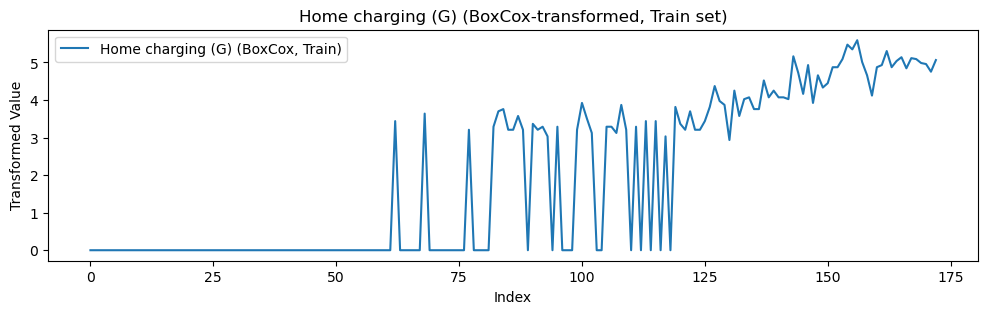

C:\Users\dylan\AppData\Local\Temp\ipykernel_9556\2266953146.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(train_bc, regression='c', nlags="auto")


==== Home charging (G) ====
ADF Statistic: -0.20937322979102604
ADF p-value: 0.9373950918228283
ADF Critical Value (1%): -3.4722
ADF Critical Value (5%): -2.8799
ADF Critical Value (10%): -2.5766
ADF: The series is likely non-stationary (fail to reject H0).
KPSS Statistic: 1.8545194253954822
KPSS p-value: 0.01
KPSS Critical Value (10%): 0.3470
KPSS Critical Value (5%): 0.4630
KPSS Critical Value (2.5%): 0.5740
KPSS Critical Value (1%): 0.7390
KPSS: The series is likely non-stationary (reject H0).



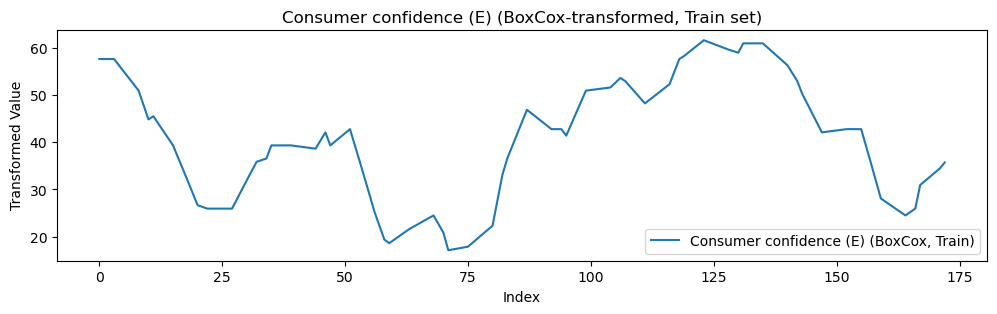

==== Consumer confidence (E) ====
ADF Statistic: -2.3510691792521663
ADF p-value: 0.1560254463294088
ADF Critical Value (1%): -3.4692
ADF Critical Value (5%): -2.8786
ADF Critical Value (10%): -2.5759
ADF: The series is likely non-stationary (fail to reject H0).
KPSS Statistic: 0.3260610689932099
KPSS p-value: 0.1
KPSS Critical Value (10%): 0.3470
KPSS Critical Value (5%): 0.4630
KPSS Critical Value (2.5%): 0.5740
KPSS Critical Value (1%): 0.7390
KPSS: The series is likely stationary (fail to reject H0).



C:\Users\dylan\AppData\Local\Temp\ipykernel_9556\2266953146.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(train_bc, regression='c', nlags="auto")


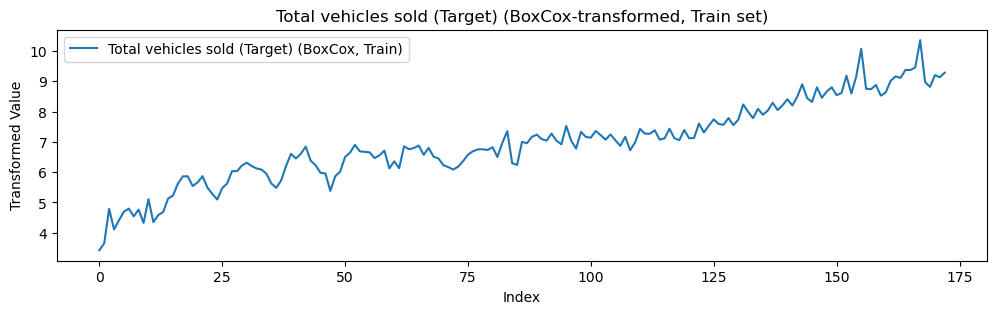

==== Total vehicles sold (Target) ====
ADF Statistic: -0.2734144213478023
ADF p-value: 0.929186159504631
ADF Critical Value (1%): -3.4722
ADF Critical Value (5%): -2.8799
ADF Critical Value (10%): -2.5766
ADF: The series is likely non-stationary (fail to reject H0).
KPSS Statistic: 1.8854846327709538
KPSS p-value: 0.01
KPSS Critical Value (10%): 0.3470
KPSS Critical Value (5%): 0.4630
KPSS Critical Value (2.5%): 0.5740
KPSS Critical Value (1%): 0.7390
KPSS: The series is likely non-stationary (reject H0).



C:\Users\dylan\AppData\Local\Temp\ipykernel_9556\2266953146.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(train_bc, regression='c', nlags="auto")


In [32]:
from statsmodels.tsa.stattools import adfuller, kpss

results = {}

# Loop over features and target
for col in features + [target]:
    # Get BoxCox-transformed train split
    train_bc = boxcox_all[col][:len(y_train)]
    
    # Plot
    plt.figure(figsize=(12, 3))
    plt.plot(train_bc, label=f"{col} (BoxCox, Train)")
    plt.title(f"{col} (BoxCox-transformed, Train set)")
    plt.xlabel("Index")
    plt.ylabel("Transformed Value")
    plt.legend()
    plt.show()
    
    # ADF test
    adf_result = adfuller(train_bc)
    # KPSS test
    kpss_result = kpss(train_bc, regression='c', nlags="auto")
    
    results[col] = {
        "ADF Statistic": adf_result[0],
        "ADF p-value": adf_result[1],
        "ADF Critical Values": adf_result[4],
        "KPSS Statistic": kpss_result[0],
        "KPSS p-value": kpss_result[1],
        "KPSS Critical Values": kpss_result[3]
    }
    
    print(f"\033[1m==== {col} ====\033[0m")
    print("\033[1mADF Statistic:\033[0m", adf_result[0])
    print("\033[1mADF p-value:\033[0m", adf_result[1])
    for key, value in adf_result[4].items():
        print(f"\033[1mADF Critical Value ({key}):\033[0m {value:.4f}")
    if adf_result[1] < 0.05:
        print("\033[1mADF: The series is likely stationary (reject H0).\033[0m")
    else:
        print("\033[1mADF: The series is likely non-stationary (fail to reject H0).\033[0m")
    print("\033[1mKPSS Statistic:\033[0m", kpss_result[0])
    print("\033[1mKPSS p-value:\033[0m", kpss_result[1])
    for key, value in kpss_result[3].items():
        print(f"\033[1mKPSS Critical Value ({key}):\033[0m {value:.4f}")
    if kpss_result[1] < 0.05:
        print("\033[1mKPSS: The series is likely non-stationary (reject H0).\033[0m")
    else:
        print("\033[1mKPSS: The series is likely stationary (fail to reject H0).\033[0m")
    print()

# 4. Apply First/second order differencing

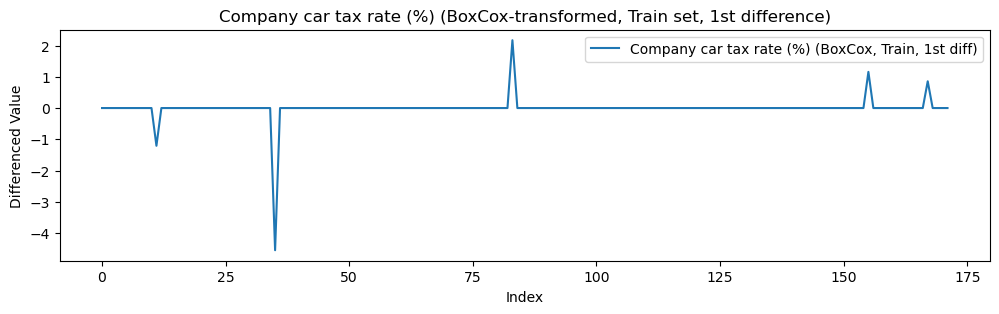

==== Company car tax rate (%) (1st diff) ====
ADF Statistic: -13.006500690837173
ADF p-value: 2.6210848840177814e-24
ADF Critical Value (1%): -3.4692
ADF Critical Value (5%): -2.8786
ADF Critical Value (10%): -2.5759
ADF: The series is likely stationary (reject H0).
KPSS Statistic: 0.3598835944545371
KPSS p-value: 0.09444672652821676
KPSS Critical Value (10%): 0.3470
KPSS Critical Value (5%): 0.4630
KPSS Critical Value (2.5%): 0.5740
KPSS Critical Value (1%): 0.7390
KPSS: The series is likely stationary (fail to reject H0).



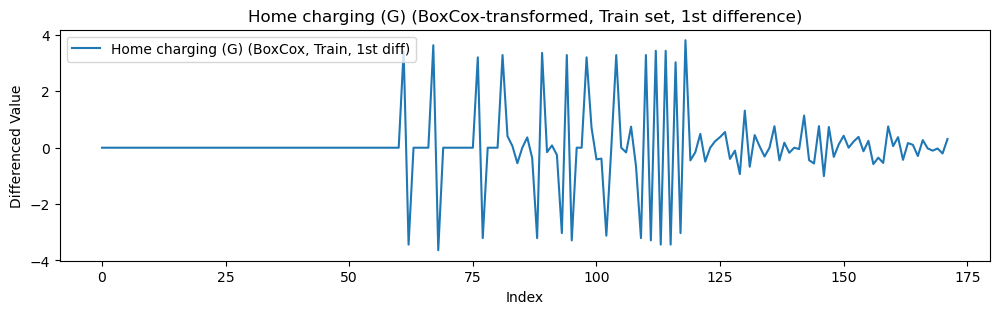

C:\Users\dylan\AppData\Local\Temp\ipykernel_9556\662543766.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff = kpss(train_bc_diff, regression='c', nlags="auto")


==== Home charging (G) (1st diff) ====
ADF Statistic: -5.432745462872665
ADF p-value: 2.8901002355923257e-06
ADF Critical Value (1%): -3.4727
ADF Critical Value (5%): -2.8801
ADF Critical Value (10%): -2.5767
ADF: The series is likely stationary (reject H0).
KPSS Statistic: 0.12832711943021022
KPSS p-value: 0.1
KPSS Critical Value (10%): 0.3470
KPSS Critical Value (5%): 0.4630
KPSS Critical Value (2.5%): 0.5740
KPSS Critical Value (1%): 0.7390
KPSS: The series is likely stationary (fail to reject H0).



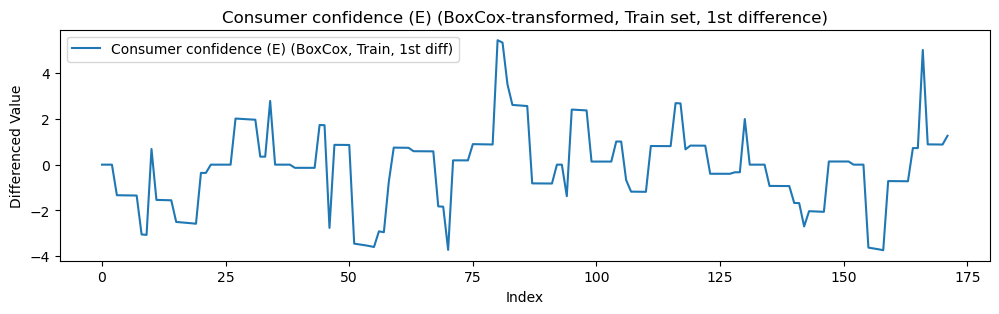

C:\Users\dylan\AppData\Local\Temp\ipykernel_9556\662543766.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff = kpss(train_bc_diff, regression='c', nlags="auto")


==== Consumer confidence (E) (1st diff) ====
ADF Statistic: -5.320846040060335
ADF p-value: 4.9566881976562114e-06
ADF Critical Value (1%): -3.4692
ADF Critical Value (5%): -2.8786
ADF Critical Value (10%): -2.5759
ADF: The series is likely stationary (reject H0).
KPSS Statistic: 0.13959754802959143
KPSS p-value: 0.1
KPSS Critical Value (10%): 0.3470
KPSS Critical Value (5%): 0.4630
KPSS Critical Value (2.5%): 0.5740
KPSS Critical Value (1%): 0.7390
KPSS: The series is likely stationary (fail to reject H0).



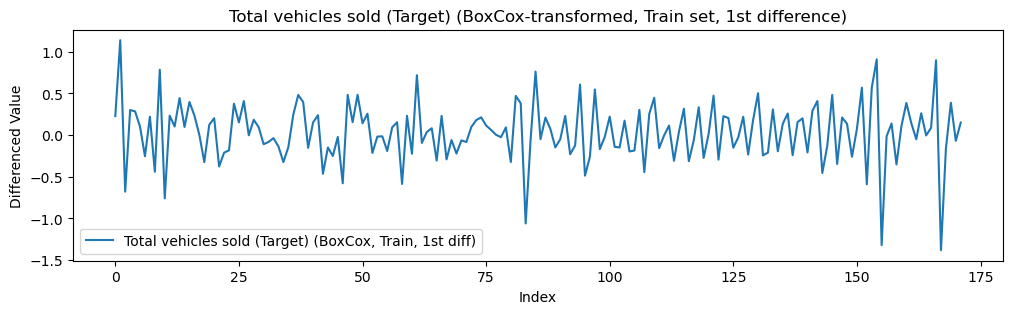

==== Total vehicles sold (Target) (1st diff) ====
ADF Statistic: -3.482309674926358
ADF p-value: 0.008453213503776685
ADF Critical Value (1%): -3.4722
ADF Critical Value (5%): -2.8799
ADF Critical Value (10%): -2.5766
ADF: The series is likely stationary (reject H0).
KPSS Statistic: 0.07044683885481265
KPSS p-value: 0.1
KPSS Critical Value (10%): 0.3470
KPSS Critical Value (5%): 0.4630
KPSS Critical Value (2.5%): 0.5740
KPSS Critical Value (1%): 0.7390
KPSS: The series is likely stationary (fail to reject H0).



C:\Users\dylan\AppData\Local\Temp\ipykernel_9556\662543766.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff = kpss(train_bc_diff, regression='c', nlags="auto")


In [33]:
# Apply first difference to BoxCox-transformed train split for all features and target
diff_results = {}

for col in features + [target]:
    train_bc = boxcox_all[col][:len(y_train)]
    train_bc_diff = np.diff(train_bc, n=1)
    diff_results[col] = train_bc_diff

    # Plot differenced series
    plt.figure(figsize=(12, 3))
    plt.plot(train_bc_diff, label=f"{col} (BoxCox, Train, 1st diff)")
    plt.title(f"{col} (BoxCox-transformed, Train set, 1st difference)")
    plt.xlabel("Index")
    plt.ylabel("Differenced Value")
    plt.legend()
    plt.show()

    # ADF test
    adf_result_diff = adfuller(train_bc_diff)
    # KPSS test
    kpss_result_diff = kpss(train_bc_diff, regression='c', nlags="auto")

    print(f"\033[1m==== {col} (1st diff) ====\033[0m")
    print("\033[1mADF Statistic:\033[0m", adf_result_diff[0])
    print("\033[1mADF p-value:\033[0m", adf_result_diff[1])
    for key, value in adf_result_diff[4].items():
        print(f"\033[1mADF Critical Value ({key}):\033[0m {value:.4f}")
    if adf_result_diff[1] < 0.05:
        print("\033[1mADF: The series is likely stationary (reject H0).\033[0m")
    else:
        print("\033[1mADF: The series is likely non-stationary (fail to reject H0).\033[0m")
    print("\033[1mKPSS Statistic:\033[0m", kpss_result_diff[0])
    print("\033[1mKPSS p-value:\033[0m", kpss_result_diff[1])
    for key, value in kpss_result_diff[3].items():
        print(f"\033[1mKPSS Critical Value ({key}):\033[0m {value:.4f}")
    if kpss_result_diff[1] < 0.05:
        print("\033[1mKPSS: The series is likely non-stationary (reject H0).\033[0m")
    else:
        print("\033[1mKPSS: The series is likely stationary (fail to reject H0).\033[0m")
    print()

#### Plotslater weglaten (dataleakage)

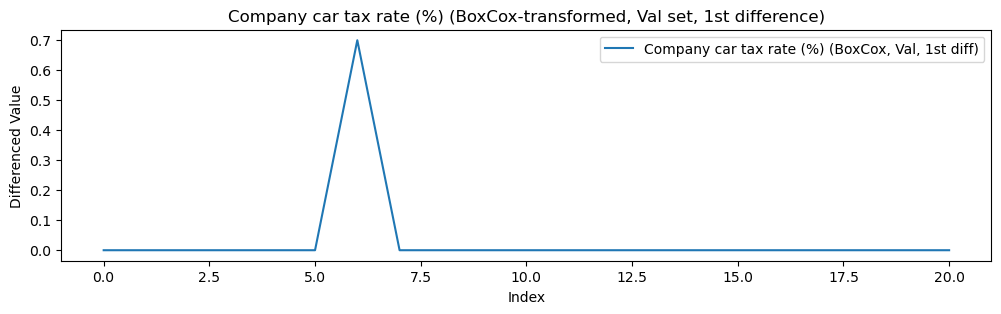

==== Company car tax rate (%) (Val, 1st diff) ====
[0.         0.         0.         0.         0.         0.
 0.70019093 0.         0.         0.        ] ...



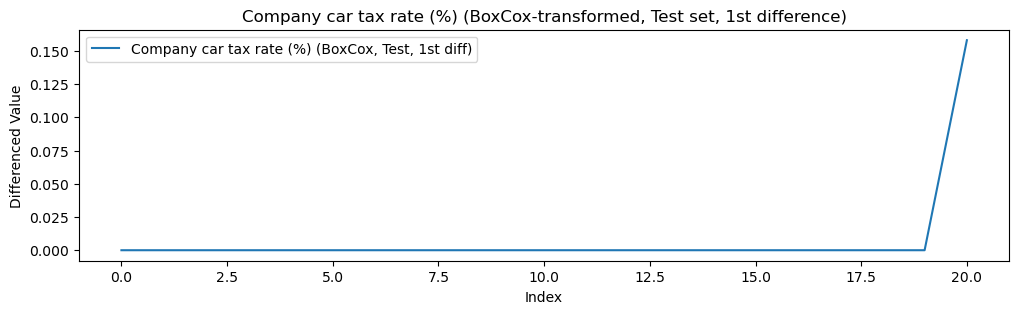

==== Company car tax rate (%) (Test, 1st diff) ====
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ...



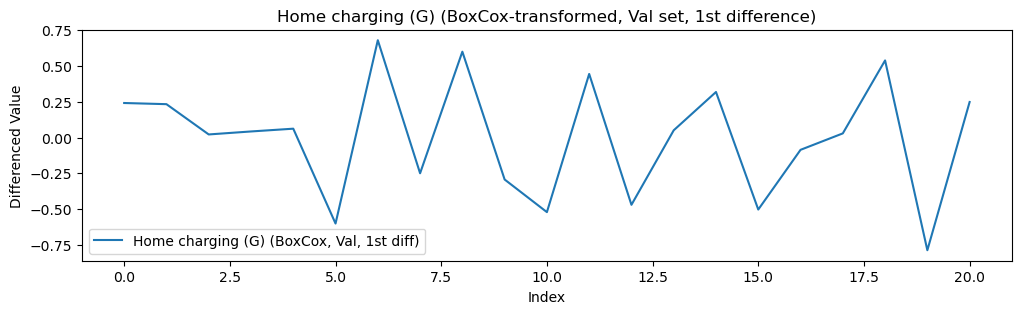

==== Home charging (G) (Val, 1st diff) ====
[ 0.2414317   0.23329673  0.0216776   0.0425566   0.06193848 -0.60090111
  0.6802004  -0.2496619   0.60004646 -0.29318434] ...



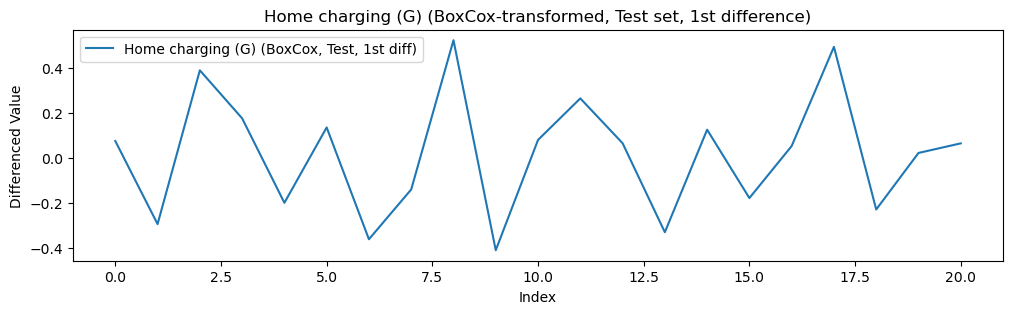

==== Home charging (G) (Test, 1st diff) ====
[ 0.0755626  -0.29534739  0.39114891  0.17691357 -0.20036506  0.13613086
 -0.36313605 -0.14069223  0.52550588 -0.41202421] ...



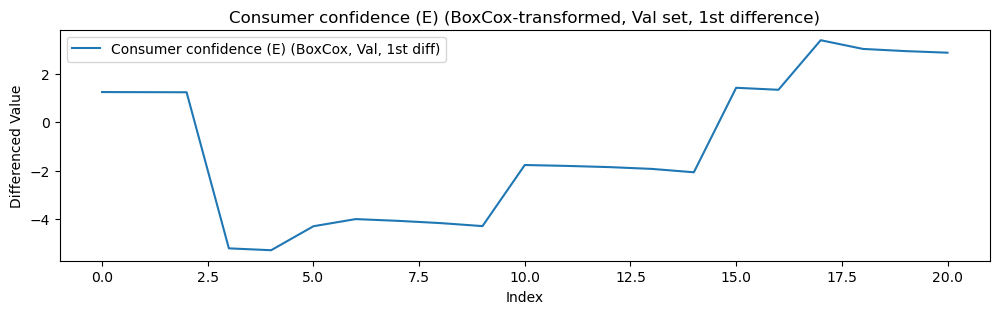

==== Consumer confidence (E) (Val, 1st diff) ====
[ 1.25195346  1.24790031  1.24399682 -5.20980122 -5.28685439 -4.2955533
 -3.99972268 -4.07230322 -4.16440343 -4.28959256] ...



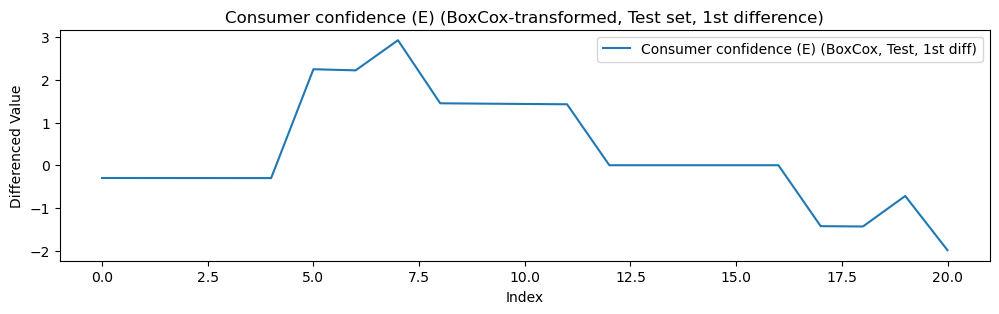

==== Consumer confidence (E) (Test, 1st diff) ====
[-0.29946508 -0.2999562  -0.30045699 -0.30096783 -0.30148912  2.24890967
  2.22296429  2.92893378  1.45108869  1.44296458] ...



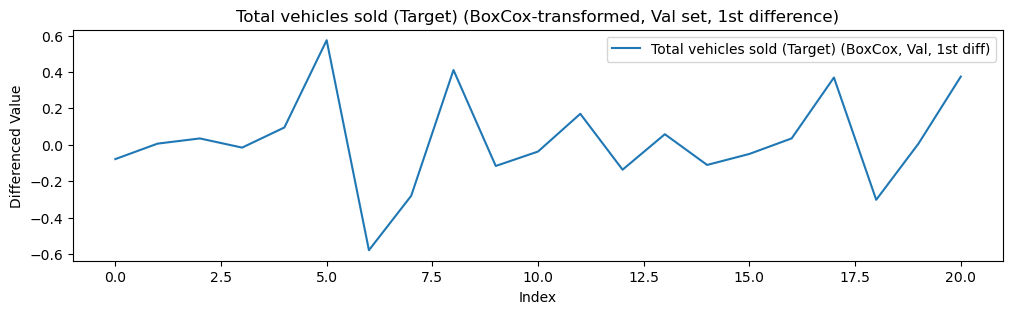

==== Total vehicles sold (Target) (Val, 1st diff) ====
[-0.0786955   0.00625765  0.03478792 -0.01559372  0.09500394  0.57407148
 -0.57903757 -0.28006187  0.41038322 -0.11644389] ...



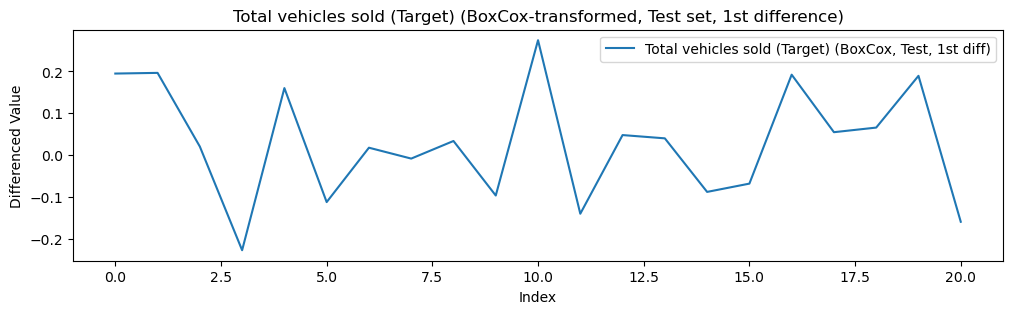

==== Total vehicles sold (Target) (Test, 1st diff) ====
[ 0.19488914  0.1965064   0.0209254  -0.2260761   0.16025237 -0.11139194
  0.01820201 -0.00772365  0.0342051  -0.09571696] ...



In [34]:
# First differencing for BoxCox-transformed val and test splits for all features and target
diff_val_results = {}
diff_test_results = {}

for col in features + [target]:
    # Validation split
    val_bc = boxcox_all[col][train_end:val_end]
    val_bc_diff = np.diff(val_bc, n=1)
    diff_val_results[col] = val_bc_diff

    plt.figure(figsize=(12, 3))
    plt.plot(val_bc_diff, label=f"{col} (BoxCox, Val, 1st diff)")
    plt.title(f"{col} (BoxCox-transformed, Val set, 1st difference)")
    plt.xlabel("Index")
    plt.ylabel("Differenced Value")
    plt.legend()
    plt.show()

    print(f"==== {col} (Val, 1st diff) ====")
    print(val_bc_diff[:10], "...")  # print first 10 values
    print()

    # Test split
    test_bc = boxcox_all[col][val_end:]
    test_bc_diff = np.diff(test_bc, n=1)
    diff_test_results[col] = test_bc_diff

    plt.figure(figsize=(12, 3))
    plt.plot(test_bc_diff, label=f"{col} (BoxCox, Test, 1st diff)")
    plt.title(f"{col} (BoxCox-transformed, Test set, 1st difference)")
    plt.xlabel("Index")
    plt.ylabel("Differenced Value")
    plt.legend()
    plt.show()

    print(f"==== {col} (Test, 1st diff) ====")
    print(test_bc_diff[:10], "...")  # print first 10 values
    print()

## 4a Fit the model for target value

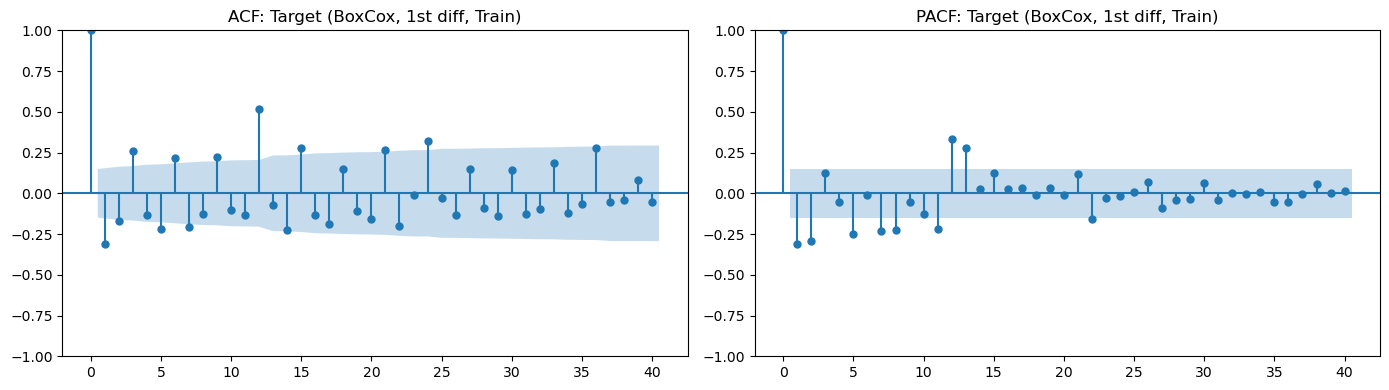

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the BoxCox-transformed, first-differenced target from the training set
target_diff = diff_results[target]

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(target_diff, ax=axes[0], lags=40)
axes[0].set_title('ACF: Target (BoxCox, 1st diff, Train)')
plot_pacf(target_diff, ax=axes[1], lags=40, method='ywm')
axes[1].set_title('PACF: Target (BoxCox, 1st diff, Train)')
plt.tight_layout()
plt.show()

In [45]:
import pmdarima as pm

# Gebruik de 1e verschil van je BoxCox-getransformeerde trainingsset
# (bijv. target_diff = np.diff(y_train_boxcox), of y_train_boxcox.diff().dropna())

auto_model = pm.auto_arima(
    y=target_diff,
    d=0,  # ✅ Forceer 1e orde verschil, omdat dat al het beste bleek
    seasonal=False,  # Zet op True als je seizoenspatroon vermoedt
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    max_p=5, max_q=5,
    max_d=0,  # ✅ Laat geen extra differencing meer toe
    information_criterion='aic'
)

print("Best SARIMA order found:", auto_model.order)
print("AIC:", auto_model.aic())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=91.401, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.139, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=122.241, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=114.798, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=114.562, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=108.823, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=83.818, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=109.541, Time=0.12 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=76.253, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=104.509, Time=0.15 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=108.842, Time=0.47 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=87.818, Time=0.43 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=85.660, Time=0.34 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=100.954, Time=0.18 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=89.016, Ti

In [48]:
import pmdarima as pm

# Mogelijke seizoenslengtes (pas aan indien gewenst)
seasonalities = [3, 6, 12]
best_aic = float('inf')
best_model = None
best_m = None

for m in seasonalities:
    print(f"\n=== Probeer SARIMA met seasonality m={m} ===")
    try:
        model = pm.auto_arima(
            y=target_diff,
            d=0,  # al gedifferentieerd
            seasonal=True,
            m=m,
            stepwise=True,
            trace=True,
            error_action='ignore',
            suppress_warnings=True,
            max_p=5, max_q=5,
            max_d=0,
            max_P=2, max_Q=2,  # seizoenscomponenten
            information_criterion='aic'
        )
        print(f"m={m}: SARIMA order={model.order}, seasonal_order={model.seasonal_order}, AIC={model.aic():.2f}")
        if model.aic() < best_aic:
            best_aic = model.aic()
            best_model = model
            best_m = m
    except Exception as e:
        print(f"m={m}: Error: {e}")

if best_model is not None:
    print(f"\nBeste SARIMA model: m={best_m}, order={best_model.order}, seasonal_order={best_model.seasonal_order}, AIC={best_aic:.2f}")
else:
    print("Geen geschikt SARIMA model gevonden.")


=== Probeer SARIMA met seasonality m=3 ===
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[3] intercept   : AIC=90.108, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=136.565, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=114.595, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=109.219, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=136.139, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[3] intercept   : AIC=73.325, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[3] intercept   : AIC=90.806, Time=0.24 sec
 ARIMA(2,0,2)(0,0,2)[3] intercept   : AIC=72.507, Time=0.48 sec
 ARIMA(2,0,2)(1,0,2)[3] intercept   : AIC=72.943, Time=0.65 sec
 ARIMA(1,0,2)(0,0,2)[3] intercept   : AIC=99.230, Time=0.47 sec
 ARIMA(2,0,1)(0,0,2)[3] intercept   : AIC=97.416, Time=0.34 sec
 ARIMA(1,0,1)(0,0,2)[3] intercept   : AIC=97.252, Time=0.66 sec
 ARIMA(2,0,2)(0,0,2)[3]             : AIC=84.224, Time=0.41 sec

Best model:  ARIMA(2,0,2)(0,0,2)[3] intercept
Total fit time: 4.433 seconds


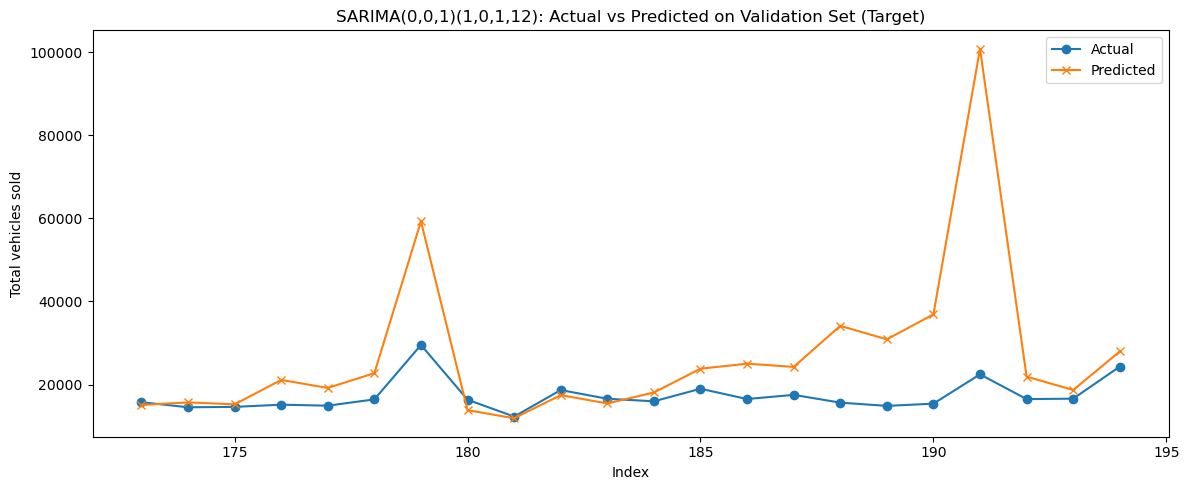

Validation RMSE: 19514.30
Validation MAPE: 52.69%


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(0,0,1)(1,0,1,12) op BoxCox-getransformeerde trainingset
model = SARIMAX(
    boxcox_all[target][:train_end],
    order=(0, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fitted_model = model.fit(disp=False)

# Forecast voor validatieset (n_val stappen vooruit)
n_val = len(y_val)
val_forecast_bc = fitted_model.forecast(steps=n_val)

# Inverse BoxCox transform
lam, shift = boxcox_lambdas_all[target]
def inv_boxcox(y, lam):
    if lam == 0:
        return np.exp(y)
    else:
        return np.power(lam * y + 1, 1/lam)

val_forecast_orig = inv_boxcox(val_forecast_bc, lam) - shift

# Actuals
actuals = y_val.values

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_val.index, actuals, label='Actual', marker='o')
plt.plot(y_val.index, val_forecast_orig, label='Predicted', marker='x')
plt.title('SARIMA(0,0,1)(1,0,1,12): Actual vs Predicted on Validation Set (Target)')
plt.xlabel('Index')
plt.ylabel('Total vehicles sold')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(actuals, val_forecast_orig))
mape = mean_absolute_percentage_error(actuals, val_forecast_orig)
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAPE: {mape:.2%}")

# 5 apply Optimal lag with target model (based on AIC/BIC)

In [51]:
import statsmodels.api as sm

# Prepare exogenous variable: use BoxCox-transformed, 1st-differenced train split for 'Company car tax rate (%)'
exog_feature = diff_results['Company car tax rate (%)']
target_diff = diff_results[target]

# Try lags 1 to 6 for exogenous variable
max_lag = 6
aic_bic_results = []

for lag in range(1, max_lag + 1):
    # Lag exogenous variable (align with target_diff)
    exog_lagged = np.roll(exog_feature, lag)
    exog_lagged[:lag] = np.nan  # first 'lag' values are invalid
    valid_idx = ~np.isnan(exog_lagged)
    y_valid = target_diff[valid_idx]
    exog_valid = exog_lagged[valid_idx].reshape(-1, 1)
    
    # Fit SARIMAX (ARIMA(0,0,0) since already differenced, no AR/MA terms)
    model = sm.tsa.SARIMAX(
        y_valid,
        order=(0, 0, 0),
        exog=exog_valid,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    res = model.fit(disp=False)
    aic_bic_results.append({
        'lag': lag,
        'AIC': res.aic,
        'BIC': res.bic
    })

# Sort by AIC and BIC
aic_sorted = sorted(aic_bic_results, key=lambda x: x['AIC'])
bic_sorted = sorted(aic_bic_results, key=lambda x: x['BIC'])

print("Optimal lags sorted by AIC:")
for r in aic_sorted:
    print(f"Lag: {r['lag']}, AIC: {r['AIC']:.2f}, BIC: {r['BIC']:.2f}")

print("\nOptimal lags sorted by BIC:")
for r in bic_sorted:
    print(f"Lag: {r['lag']}, AIC: {r['AIC']:.2f}, BIC: {r['BIC']:.2f}")

Optimal lags sorted by AIC:
Lag: 3, AIC: 121.97, BIC: 128.22
Lag: 6, AIC: 122.87, BIC: 129.08
Lag: 4, AIC: 123.14, BIC: 129.37
Lag: 5, AIC: 123.54, BIC: 129.77
Lag: 2, AIC: 124.15, BIC: 130.41
Lag: 1, AIC: 127.14, BIC: 133.42

Optimal lags sorted by BIC:
Lag: 3, AIC: 121.97, BIC: 128.22
Lag: 6, AIC: 122.87, BIC: 129.08
Lag: 4, AIC: 123.14, BIC: 129.37
Lag: 5, AIC: 123.54, BIC: 129.77
Lag: 2, AIC: 124.15, BIC: 130.41
Lag: 1, AIC: 127.14, BIC: 133.42


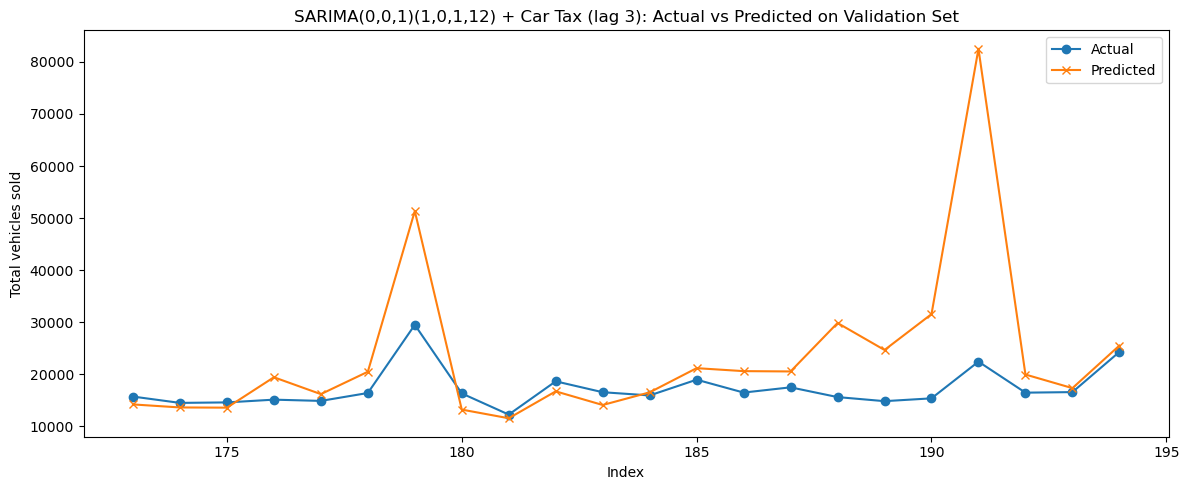

Validation RMSE: 14696.04
Validation MAPE: 37.57%


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare exogenous variable: BoxCox-transformed, lagged by 3 (train/val split)
car_tax_bc = boxcox_all['Company car tax rate (%)']
car_tax_train_exog = car_tax_bc[:train_end]
car_tax_val_exog = car_tax_bc[train_end:val_end]

# Lag by 3 (align with SARIMA forecast)
car_tax_train_exog_lag3 = np.roll(car_tax_train_exog, 3)
car_tax_train_exog_lag3[:3] = np.nan  # first 3 values invalid

# Drop first 3 rows from train to align with lagged exog
y_train_bc = boxcox_all[target][:train_end][3:]
car_tax_train_exog_lag3 = car_tax_train_exog_lag3[3:]

# Fit SARIMA with exogenous feature (lag 3)
model = SARIMAX(
    y_train_bc,
    exog=car_tax_train_exog_lag3.reshape(-1, 1),
    order=(0, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fitted_model = model.fit(disp=False)

# Prepare validation exog (lag 3: use last 3 train values + val)
car_tax_val_exog_full = np.concatenate([car_tax_bc[train_end-3:train_end], car_tax_val_exog])
car_tax_val_exog_lag3 = np.roll(car_tax_val_exog_full, 3)[3:]

# Forecast for validation set
n_val = len(y_val)
val_forecast_bc = fitted_model.forecast(steps=n_val, exog=car_tax_val_exog_lag3.reshape(-1, 1))

# Inverse BoxCox transform
lam, shift = boxcox_lambdas_all[target]
def inv_boxcox(y, lam):
    if lam == 0:
        return np.exp(y)
    else:
        return np.power(lam * y + 1, 1/lam)

val_forecast_orig = inv_boxcox(val_forecast_bc, lam) - shift

# Actuals
actuals = y_val.values

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_val.index, actuals, label='Actual', marker='o')
plt.plot(y_val.index, val_forecast_orig, label='Predicted', marker='x')
plt.title('SARIMA(0,0,1)(1,0,1,12) + Car Tax (lag 3): Actual vs Predicted on Validation Set')
plt.xlabel('Index')
plt.ylabel('Total vehicles sold')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(actuals, val_forecast_orig))
mape = mean_absolute_percentage_error(actuals, val_forecast_orig)
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAPE: {mape:.2%}")

### Google Home Charging

In [56]:
import statsmodels.api as sm

# Use BoxCox-transformed, 1st-differenced train split for 'Home charging (G)'
exog_feature = diff_results['Home charging (G)']
target_diff = diff_results[target]

# Try lags 1 to 6 for exogenous variable
max_lag = 6
aic_bic_results_homechg = []

for lag in range(1, max_lag + 1):
    # Lag exogenous variable (align with target_diff)
    exog_lagged = np.roll(exog_feature, lag)
    exog_lagged[:lag] = np.nan  # first 'lag' values are invalid
    valid_idx = ~np.isnan(exog_lagged)
    y_valid = target_diff[valid_idx]
    exog_valid = exog_lagged[valid_idx].reshape(-1, 1)
    
    # Fit SARIMAX (ARIMA(0,0,0) since already differenced, no AR/MA terms)
    model = sm.tsa.SARIMAX(
        y_valid,
        order=(0, 0, 0),
        exog=exog_valid,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    res = model.fit(disp=False)
    aic_bic_results_homechg.append({
        'lag': lag,
        'AIC': res.aic,
        'BIC': res.bic
    })

# Sort by AIC and BIC
aic_sorted_homechg = sorted(aic_bic_results_homechg, key=lambda x: x['AIC'])
bic_sorted_homechg = sorted(aic_bic_results_homechg, key=lambda x: x['BIC'])

print("Optimal lags for Home charging (G) sorted by AIC:")
for r in aic_sorted_homechg:
    print(f"Lag: {r['lag']}, AIC: {r['AIC']:.2f}, BIC: {r['BIC']:.2f}")

print("\nOptimal lags for Home charging (G) sorted by BIC:")
for r in bic_sorted_homechg:
    print(f"Lag: {r['lag']}, AIC: {r['AIC']:.2f}, BIC: {r['BIC']:.2f}")

Optimal lags for Home charging (G) sorted by AIC:
Lag: 5, AIC: 120.82, BIC: 127.04
Lag: 4, AIC: 121.93, BIC: 128.17
Lag: 3, AIC: 123.11, BIC: 129.36
Lag: 6, AIC: 123.32, BIC: 129.54
Lag: 2, AIC: 124.16, BIC: 130.42
Lag: 1, AIC: 126.97, BIC: 133.25

Optimal lags for Home charging (G) sorted by BIC:
Lag: 5, AIC: 120.82, BIC: 127.04
Lag: 4, AIC: 121.93, BIC: 128.17
Lag: 3, AIC: 123.11, BIC: 129.36
Lag: 6, AIC: 123.32, BIC: 129.54
Lag: 2, AIC: 124.16, BIC: 130.42
Lag: 1, AIC: 126.97, BIC: 133.25


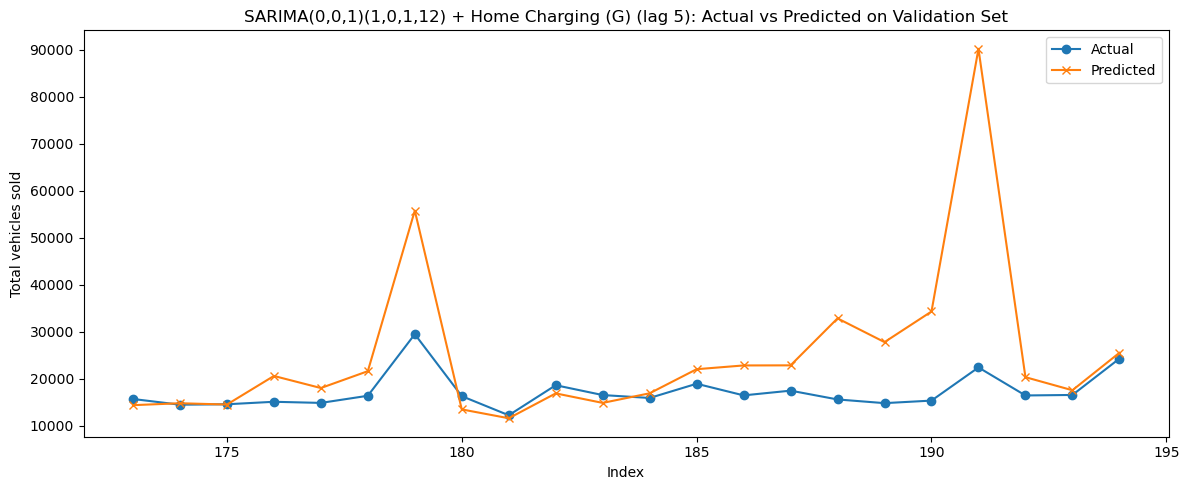

Validation RMSE: 16898.08
Validation MAPE: 44.54%


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare exogenous variable: BoxCox-transformed, lagged by 5 (train/val split)
homechg_bc = boxcox_all['Home charging (G)']
homechg_train_exog = homechg_bc[:train_end]
homechg_val_exog = homechg_bc[train_end:val_end]

# Lag by 5 (align with SARIMA forecast)
homechg_train_exog_lag5 = np.roll(homechg_train_exog, 5)
homechg_train_exog_lag5[:5] = np.nan  # first 5 values invalid

# Drop first 5 rows from train to align with lagged exog
y_train_bc = boxcox_all[target][:train_end][5:]
homechg_train_exog_lag5 = homechg_train_exog_lag5[5:]

# Fit SARIMA with exogenous feature (lag 5)
model = SARIMAX(
    y_train_bc,
    exog=homechg_train_exog_lag5.reshape(-1, 1),
    order=(0, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fitted_model = model.fit(disp=False)

# Prepare validation exog (lag 5: use last 5 train values + val)
homechg_val_exog_full = np.concatenate([homechg_bc[train_end-5:train_end], homechg_val_exog])
homechg_val_exog_lag5 = np.roll(homechg_val_exog_full, 5)[5:]

# Forecast for validation set
n_val = len(y_val)
val_forecast_bc = fitted_model.forecast(steps=n_val, exog=homechg_val_exog_lag5.reshape(-1, 1))

# Inverse BoxCox transform
lam, shift = boxcox_lambdas_all[target]
def inv_boxcox(y, lam):
    if lam == 0:
        return np.exp(y)
    else:
        return np.power(lam * y + 1, 1/lam)

val_forecast_orig = inv_boxcox(val_forecast_bc, lam) - shift

# Actuals
actuals = y_val.values

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_val.index, actuals, label='Actual', marker='o')
plt.plot(y_val.index, val_forecast_orig, label='Predicted', marker='x')
plt.title('SARIMA(0,0,1)(1,0,1,12) + Home Charging (G) (lag 5): Actual vs Predicted on Validation Set')
plt.xlabel('Index')
plt.ylabel('Total vehicles sold')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(actuals, val_forecast_orig))
mape = mean_absolute_percentage_error(actuals, val_forecast_orig)
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAPE: {mape:.2%}")

In [58]:
import statsmodels.api as sm

# Use BoxCox-transformed, 1st-differenced train split for 'Consumer confidence (E)'
exog_feature_conf = np.diff(boxcox_all['Consumer confidence (E)'][:train_end], n=1)
target_diff = train_bc_diff

# Try lags 1 to 6 for exogenous variable
max_lag = 6
aic_bic_results_conf = []

for lag in range(1, max_lag + 1):
    # Lag exogenous variable (align with target_diff)
    exog_lagged = np.roll(exog_feature_conf, lag)
    exog_lagged[:lag] = np.nan  # first 'lag' values are invalid
    valid_idx = ~np.isnan(exog_lagged)
    y_valid = target_diff[valid_idx]
    exog_valid = exog_lagged[valid_idx].reshape(-1, 1)
    
    # Fit SARIMAX (ARIMA(0,0,0) since already differenced, no AR/MA terms)
    model = sm.tsa.SARIMAX(
        y_valid,
        order=(0, 0, 0),
        exog=exog_valid,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    res = model.fit(disp=False)
    aic_bic_results_conf.append({
        'lag': lag,
        'AIC': res.aic,
        'BIC': res.bic
    })

# Sort by AIC and BIC
aic_sorted_conf = sorted(aic_bic_results_conf, key=lambda x: x['AIC'])
bic_sorted_conf = sorted(aic_bic_results_conf, key=lambda x: x['BIC'])

print("Optimal lags for Consumer confidence (E) sorted by AIC:")
for r in aic_sorted_conf:
    print(f"Lag: {r['lag']}, AIC: {r['AIC']:.2f}, BIC: {r['BIC']:.2f}")

print("\nOptimal lags for Consumer confidence (E) sorted by BIC:")
for r in bic_sorted_conf:
    print(f"Lag: {r['lag']}, AIC: {r['AIC']:.2f}, BIC: {r['BIC']:.2f}")

Optimal lags for Consumer confidence (E) sorted by AIC:
Lag: 6, AIC: 123.13, BIC: 129.34
Lag: 4, AIC: 123.38, BIC: 129.62
Lag: 3, AIC: 123.44, BIC: 129.69
Lag: 5, AIC: 123.55, BIC: 129.78
Lag: 2, AIC: 124.23, BIC: 130.49
Lag: 1, AIC: 127.64, BIC: 133.92

Optimal lags for Consumer confidence (E) sorted by BIC:
Lag: 6, AIC: 123.13, BIC: 129.34
Lag: 4, AIC: 123.38, BIC: 129.62
Lag: 3, AIC: 123.44, BIC: 129.69
Lag: 5, AIC: 123.55, BIC: 129.78
Lag: 2, AIC: 124.23, BIC: 130.49
Lag: 1, AIC: 127.64, BIC: 133.92


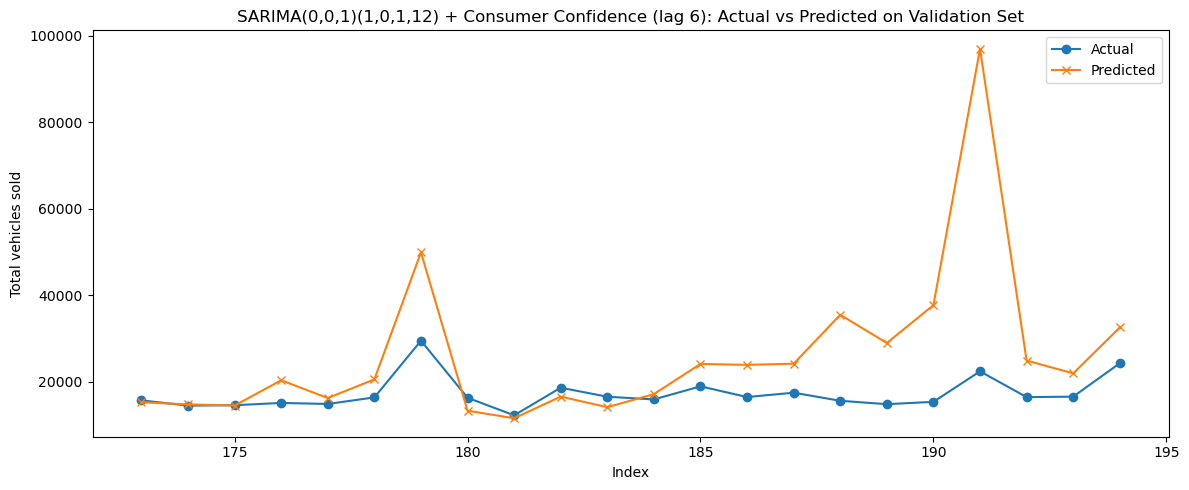

Validation RMSE: 18368.10
Validation MAPE: 51.26%


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare exogenous variable: BoxCox-transformed, lagged by 6 (train/val split)
conf_bc = boxcox_all['Consumer confidence (E)']
conf_train_exog = conf_bc[:train_end]
conf_val_exog = conf_bc[train_end:val_end]

# Lag by 6 (align with SARIMA forecast)
conf_train_exog_lag6 = np.roll(conf_train_exog, 6)
conf_train_exog_lag6[:6] = np.nan  # first 6 values invalid

# Drop first 6 rows from train to align with lagged exog
y_train_bc = boxcox_all[target][:train_end][6:]
conf_train_exog_lag6 = conf_train_exog_lag6[6:]

# Fit SARIMA with exogenous feature (lag 6)
model = SARIMAX(
    y_train_bc,
    exog=conf_train_exog_lag6.reshape(-1, 1),
    order=(0, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fitted_model = model.fit(disp=False)

# Prepare validation exog (lag 6: use last 6 train values + val)
conf_val_exog_full = np.concatenate([conf_bc[train_end-6:train_end], conf_val_exog])
conf_val_exog_lag6 = np.roll(conf_val_exog_full, 6)[6:]

# Forecast for validation set
n_val = len(y_val)
val_forecast_bc = fitted_model.forecast(steps=n_val, exog=conf_val_exog_lag6.reshape(-1, 1))

# Inverse BoxCox transform
lam, shift = boxcox_lambdas_all[target]
def inv_boxcox(y, lam):
    if lam == 0:
        return np.exp(y)
    else:
        return np.power(lam * y + 1, 1/lam)

val_forecast_orig = inv_boxcox(val_forecast_bc, lam) - shift

# Actuals
actuals = y_val.values

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_val.index, actuals, label='Actual', marker='o')
plt.plot(y_val.index, val_forecast_orig, label='Predicted', marker='x')
plt.title('SARIMA(0,0,1)(1,0,1,12) + Consumer Confidence (lag 6): Actual vs Predicted on Validation Set')
plt.xlabel('Index')
plt.ylabel('Total vehicles sold')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(actuals, val_forecast_orig))
mape = mean_absolute_percentage_error(actuals, val_forecast_orig)
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAPE: {mape:.2%}")

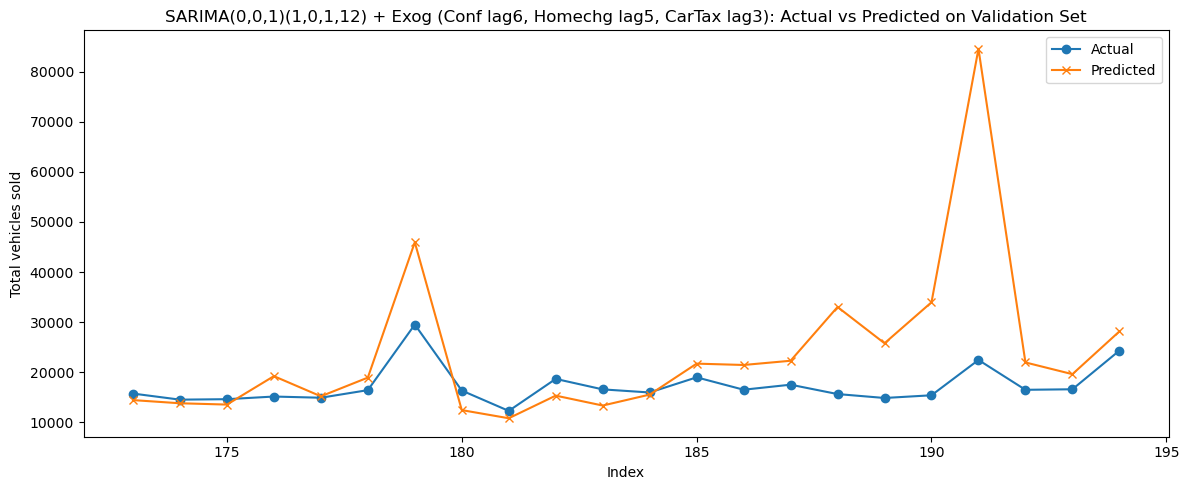

Validation RMSE: 15176.37
Validation MAPE: 41.68%


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare exogenous variables: BoxCox-transformed, lagged by 6/5/3 (train/val split)
conf_bc = boxcox_all['Consumer confidence (E)']
homechg_bc = boxcox_all['Home charging (G)']
car_tax_bc = boxcox_all['Company car tax rate (%)']

# Train splits
conf_train_exog = conf_bc[:train_end]
homechg_train_exog = homechg_bc[:train_end]
car_tax_train_exog = car_tax_bc[:train_end]

# Apply lags
conf_train_exog_lag6 = np.roll(conf_train_exog, 6)
conf_train_exog_lag6[:6] = np.nan

homechg_train_exog_lag5 = np.roll(homechg_train_exog, 5)
homechg_train_exog_lag5[:5] = np.nan

car_tax_train_exog_lag3 = np.roll(car_tax_train_exog, 3)
car_tax_train_exog_lag3[:3] = np.nan

# Align all exogenous variables and target (drop first 6 rows)
y_train_bc = boxcox_all[target][:train_end][6:]
conf_train_exog_lag6 = conf_train_exog_lag6[6:]
homechg_train_exog_lag5 = homechg_train_exog_lag5[6:]
car_tax_train_exog_lag3 = car_tax_train_exog_lag3[6:]

exog_train = np.column_stack([conf_train_exog_lag6, homechg_train_exog_lag5, car_tax_train_exog_lag3])

# Fit SARIMA with all exogenous features
model = SARIMAX(
    y_train_bc,
    exog=exog_train,
    order=(0, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fitted_model = model.fit(disp=False)

# Prepare validation exog (use last lags from train + val)
conf_val_exog_full = np.concatenate([conf_bc[train_end-6:train_end], conf_bc[train_end:val_end]])
homechg_val_exog_full = np.concatenate([homechg_bc[train_end-5:train_end], homechg_bc[train_end:val_end]])
car_tax_val_exog_full = np.concatenate([car_tax_bc[train_end-3:train_end], car_tax_bc[train_end:val_end]])

conf_val_exog_lag6 = np.roll(conf_val_exog_full, 6)[6:]
homechg_val_exog_lag5 = np.roll(homechg_val_exog_full, 5)[5:]
car_tax_val_exog_lag3 = np.roll(car_tax_val_exog_full, 3)[3:]

exog_val = np.column_stack([conf_val_exog_lag6, homechg_val_exog_lag5, car_tax_val_exog_lag3])

# Forecast for validation set
n_val = len(y_val)
val_forecast_bc = fitted_model.forecast(steps=n_val, exog=exog_val)

# Inverse BoxCox transform
lam, shift = boxcox_lambdas_all[target]
def inv_boxcox(y, lam):
    if lam == 0:
        return np.exp(y)
    else:
        return np.power(lam * y + 1, 1/lam)

val_forecast_orig = inv_boxcox(val_forecast_bc, lam) - shift

# Actuals
actuals = y_val.values

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_val.index, actuals, label='Actual', marker='o')
plt.plot(y_val.index, val_forecast_orig, label='Predicted', marker='x')
plt.title('SARIMA(0,0,1)(1,0,1,12) + Exog (Conf lag6, Homechg lag5, CarTax lag3): Actual vs Predicted on Validation Set')
plt.xlabel('Index')
plt.ylabel('Total vehicles sold')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(actuals, val_forecast_orig))
mape = mean_absolute_percentage_error(actuals, val_forecast_orig)
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAPE: {mape:.2%}")


# 6 Plot/evaluate with target value

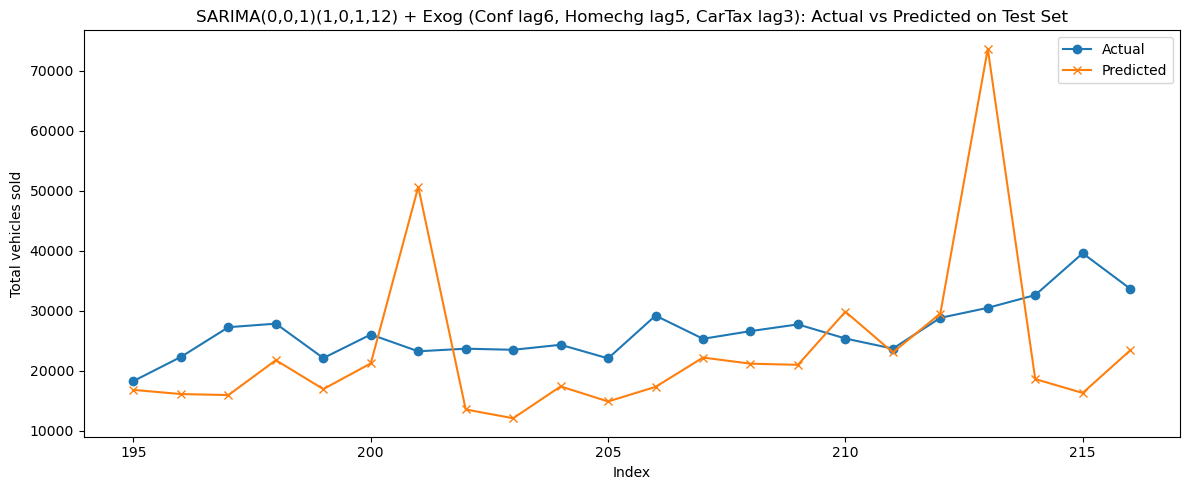

Test RMSE: 13980.82
Test MAPE: 36.65%


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare exogenous variables: BoxCox-transformed, lagged by 6/5/3 (train/test split)
conf_bc = boxcox_all['Consumer confidence (E)']
homechg_bc = boxcox_all['Home charging (G)']
car_tax_bc = boxcox_all['Company car tax rate (%)']

# Train splits
conf_train_exog = conf_bc[:train_end]
homechg_train_exog = homechg_bc[:train_end]
car_tax_train_exog = car_tax_bc[:train_end]

# Apply lags
conf_train_exog_lag6 = np.roll(conf_train_exog, 6)
conf_train_exog_lag6[:6] = np.nan

homechg_train_exog_lag5 = np.roll(homechg_train_exog, 5)
homechg_train_exog_lag5[:5] = np.nan

car_tax_train_exog_lag3 = np.roll(car_tax_train_exog, 3)
car_tax_train_exog_lag3[:3] = np.nan

# Align all exogenous variables and target (drop first 6 rows)
y_train_bc = boxcox_all[target][:train_end][6:]
conf_train_exog_lag6 = conf_train_exog_lag6[6:]
homechg_train_exog_lag5 = homechg_train_exog_lag5[6:]
car_tax_train_exog_lag3 = car_tax_train_exog_lag3[6:]

exog_train = np.column_stack([conf_train_exog_lag6, homechg_train_exog_lag5, car_tax_train_exog_lag3])

# Fit SARIMA with all exogenous features
model = SARIMAX(
    y_train_bc,
    exog=exog_train,
    order=(0, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fitted_model = model.fit(disp=False)

# Prepare test exog (use last lags from train + test)
conf_test_exog_full = np.concatenate([conf_bc[train_end-6:train_end], conf_bc[train_end:]])
homechg_test_exog_full = np.concatenate([homechg_bc[train_end-5:train_end], homechg_bc[train_end:]])
car_tax_test_exog_full = np.concatenate([car_tax_bc[train_end-3:train_end], car_tax_bc[train_end:]])

conf_test_exog_lag6 = np.roll(conf_test_exog_full, 6)[6:]
homechg_test_exog_lag5 = np.roll(homechg_test_exog_full, 5)[5:]
car_tax_test_exog_lag3 = np.roll(car_tax_test_exog_full, 3)[3:]

# Only select test set indices
n_test = len(y_test)
exog_test = np.column_stack([
    conf_test_exog_lag6[-n_test:],
    homechg_test_exog_lag5[-n_test:],
    car_tax_test_exog_lag3[-n_test:]
])

# Forecast for test set
test_forecast_bc = fitted_model.forecast(steps=n_test, exog=exog_test)

# Inverse BoxCox transform
lam, shift = boxcox_lambdas_all[target]
def inv_boxcox(y, lam):
    if lam == 0:
        return np.exp(y)
    else:
        return np.power(lam * y + 1, 1/lam)

test_forecast_orig = inv_boxcox(test_forecast_bc, lam) - shift

# Actuals
actuals = y_test.values

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, actuals, label='Actual', marker='o')
plt.plot(y_test.index, test_forecast_orig, label='Predicted', marker='x')
plt.title('SARIMA(0,0,1)(1,0,1,12) + Exog (Conf lag6, Homechg lag5, CarTax lag3): Actual vs Predicted on Test Set')
plt.xlabel('Index')
plt.ylabel('Total vehicles sold')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(actuals, test_forecast_orig))
mape = mean_absolute_percentage_error(actuals, test_forecast_orig)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAPE: {mape:.2%}")
